# Analyzing and Predicting Traffic Accident Severity

## Applied Data Science Capstone by IBM/Coursera

### Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Maching Learning](#Maching_Learning)
* [Evaluation](#Evaluation)

### INTRODUCTION: Business Problem

The mortality and morbidity rates from road traffic accidents are increasing annually in nearly all the developed countries. Despite all the causes of accidents, it will be great to predict the severity of an accident, so **people, emergency,government**.. will be more conscious about the factors thay may produce an accident and its severity and they can implement accident prevention procedures.

### 2- Data :

#### 2.1- Data Source
The dataset, we will be using in this project was downloaded from the City of Seattle Open Data portal website. Seattle Police Department and Accident Traffic Records Department collected and maintained data from 2004 to present. The data includes many columns of details of the accidents and the severity of each car accidents.The dataset was provided in the IBM course on coursera, you can find it in the directory "Data" in the project repository

In [1]:
import pandas as pd 
data = pd.read_csv("./data/Data-Collisions.csv") 

c:\users\oumaima\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
data.shape

(194673, 38)

The dataset provides us with 194673 individuals and 38 features, since we want to predict the severity of an accident, we choose as a target the "SEVERITYCODE" attribute.


#### 2.2- Data Cleaning

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In our quest to predict the severity of an accident, we have come across a dataset which has lots of NaN values in its original form. It has 221,525 rows and 37 columns. After inspecting the dataset carefully using the metadata PDF, I have decided that only 6 columns can help us to make a proper prediction and they are - 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL', 'SEVERITYCODE'. Out of which, 'SEVERITYCODE' is the target variable. A code that corresponds to the severity of the collision:

• 3—fatality

• 2b—serious injury

• 2—injury

• 1—prop damage

• 0—unknown
After dropping the rows containing NaN values and unnecessary columns, we start label encoding the columns we have:

• 'HITPARKEDCAR' - {0: 'N', 1: 'Y'}

• 'LIGHTCOND' - {0: 'Dark - No Street Lights', 1: 'Dark - Street Lights Off', 2: 'Dark - Street Lights On', 3: 'Dark - Unknown Lighting', 4: 'Dawn', 5: 'Daylight', 6: 'Dusk', 7: 'Other', 8: 'Unknown'}

• 'ROADCOND' - {0: 'Dry', 1: 'Ice', 2: 'Oil', 3: 'Other', 4: 'Sand/Mud/Dirt', 5: 'Snow/Slush', 6: 'Standing Water', 7: 'Unknown', 8: 'Wet'}

• 'WEATHER' - {0: 'Blowing Sand/Dirt', 1: 'Clear', 2: 'Fog/Smog/Smoke', 3: 'Other', 4: 'Overcast', 5: 'Partly Cloudy', 6: 'Raining', 7: 'Severe Crosswind', 8: 'Sleet/Hail/Freezing Rain', 9: 'Snowing', 10: 'Unknown'}

• 'UNDERINFL' – {0: ‘N’, 1: ‘Y’}

Get the ratio of column with above 80% of missing values

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.60]

In [5]:
data = data[[ 'INCDATE', 'ADDRTYPE', 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL', 'SEVERITYCODE']]
print(data.shape)
data.head()

(194673, 8)


,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
0,2013/03/27 00:00:00+00,Intersection,N,Daylight,Wet,Overcast,N,2
1,2006/12/20 00:00:00+00,Block,N,Dark - Street Lights On,Wet,Raining,0,1
2,2004/11/18 00:00:00+00,Block,N,Daylight,Dry,Overcast,0,1
3,2013/03/29 00:00:00+00,Block,N,Daylight,Dry,Clear,N,1
4,2004/01/28 00:00:00+00,Intersection,N,Daylight,Wet,Raining,0,2


In [6]:
data.count()

INCDATE         194673
ADDRTYPE        192747
HITPARKEDCAR    194673
LIGHTCOND       189503
ROADCOND        189661
WEATHER         189592
UNDERINFL       189789
SEVERITYCODE    194673
dtype: int64

In [7]:
data = data.dropna()
data.count()

INCDATE         187525
ADDRTYPE        187525
HITPARKEDCAR    187525
LIGHTCOND       187525
ROADCOND        187525
WEATHER         187525
UNDERINFL       187525
SEVERITYCODE    187525
dtype: int64

In [8]:
data["ROADCOND"] = data["ROADCOND"].astype('category')
data["ROADCOND"] = data["ROADCOND"].cat.codes

data["LIGHTCOND"] = data["LIGHTCOND"].astype('category')
data["LIGHTCOND"] = data["LIGHTCOND"].cat.codes

data["ADDRTYPE"] = data["ADDRTYPE"].astype('category')
data["ADDRTYPE"] = data["ADDRTYPE"].cat.codes

data["WEATHER"] = data["WEATHER"].astype('category')
data["WEATHER"] = data["WEATHER"].cat.codes

data['HITPARKEDCAR'] = data.HITPARKEDCAR.astype('category')
data['HITPARKEDCAR'] = data.HITPARKEDCAR.astype('category').cat.codes

data["UNDERINFL"].replace("N", 0, inplace=True)
data["UNDERINFL"].replace("Y", 1, inplace=True)
data["UNDERINFL"].replace("0", 0, inplace=True)
data["UNDERINFL"].replace("1", 1, inplace=True)


data.head()

,INCDATE,ADDRTYPE,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL,SEVERITYCODE
0,2013/03/27 00:00:00+00,2,0,5,8,4,0,2
1,2006/12/20 00:00:00+00,1,0,2,8,6,0,1
2,2004/11/18 00:00:00+00,1,0,5,0,4,0,1
3,2013/03/29 00:00:00+00,1,0,5,0,1,0,1
4,2004/01/28 00:00:00+00,2,0,5,8,6,0,2


#### 2.3 Feature Selection

A total of 5 features were selected to predict the target variable which is the 'SEVERITYCODE'.

• 'HITPARKEDCAR' - Whether the collision involved hitting a parked car. (Y/N)

• 'LIGHTCOND' - The light conditions during the collision.

• 'ROADCOND' - The condition of the road during the collision.

• 'WEATHER' - A description of the weather conditions during the time of the collision.

• 'UNDERINFL' – Whether or not a driver involved was under the influence of drugs or alcohol.

In [9]:
feature_df = data[[ 'HITPARKEDCAR', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'UNDERINFL']]
print(feature_df.shape)
feature_df.head()

(187525, 5)


,HITPARKEDCAR,LIGHTCOND,ROADCOND,WEATHER,UNDERINFL
0,0,5,8,4,0
1,0,2,8,6,0
2,0,5,0,4,0
3,0,5,0,1,0
4,0,5,8,6,0


In [10]:

target_df = data[['SEVERITYCODE']]
print(target_df.shape)
target_df.head()

(187525, 1)


,SEVERITYCODE
0,2
1,1
2,1
3,1
4,2


#### 3-Methodology

##### 3.1 Eploratory Analysis

**Relationships between Weather and Severitycode**

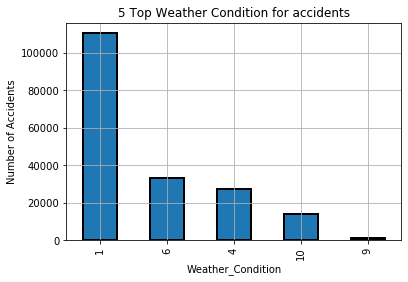

In [11]:
data['WEATHER'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition')
plt.ylabel('Number of Accidents')
plt.title('5 Top Weather Condition for accidents')
plt.grid()
plt.ioff()

**Relationship between Light Condition and Severity Code**

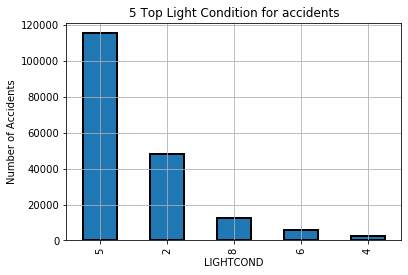

In [12]:
data['LIGHTCOND'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('LIGHTCOND')
plt.ylabel('Number of Accidents')
plt.title('5 Top Light Condition for accidents')
plt.grid()
plt.ioff()

**Relationship between Road Condition and Sevrity Code**

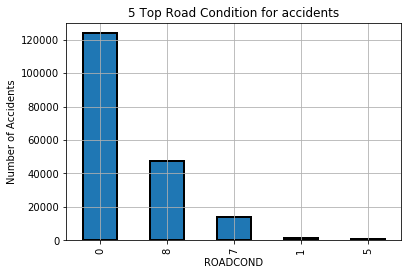

In [13]:
data['ROADCOND'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('ROADCOND')
plt.ylabel('Number of Accidents')
plt.title('5 Top Road Condition for accidents')
plt.grid()
plt.ioff()

**Relationship between ADDRTYPE and Sevrity Code**

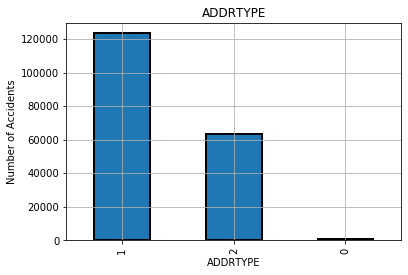

In [14]:
data['ADDRTYPE'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('ADDRTYPE')
plt.ylabel('Number of Accidents')
plt.title('ADDRTYPE')
plt.grid()
plt.ioff()

### 4-Machine Learning

**Spliting the data**

In [15]:
X = feature_df
y = y = target_df['SEVERITYCODE'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131267, 5) (131267,)
Test set: (56258, 5) (56258,)


The Machine Learning models we will be using are :

**Logistic Regression**

o Definition: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

o Advantages: Logistic regression is designed for this purpose (classification) and is most useful for understanding the influence of several independent variables on a single outcome variable.

o Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver="liblinear").fit(X_train, y_train)
LR

#Predict
LRythat = LR.predict(X_test)

**Decision Tree**

o Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

o Advantages: Decision Tree is simple to understand and visualize, requires little data preparation, and can handle both numerical and categorical data.

o Disadvantages: Decision tree can create complex trees that do not generalize well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [17]:
# building the decision tree
import numpy as np
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7)
clf = clf.fit(X_train,y_train)

# Predict
Dythat = clf.predict(X_test)

### 5-Evaluation

In [18]:
from sklearn.metrics import jaccard_score
#Decision tree
print( "decision tree score = ",jaccard_score(y_test, Dythat))
#LinearRegression
print("Logistic regression score = ",jaccard_score(y_test, LRythat))

decision tree score =  0.6978385296313413
Logistic regression score =  0.6975123139570034
